# Analyze Keyword Correlation

This notebook performs exploratory analysis on exception report texts from pharmaceutical manufacturing processes. It identifies the top keywords most associated with each classification label using term frequency analysis.

In [42]:
!pip install --upgrade pip
!pip install pandas
!pip install scikit-learn
!pip install matplotlib

In [44]:
"""
exception-text-correlation-analyzer
------------------------------------
This script performs exploratory analysis on exception report texts from 
pharmaceutical manufacturing processes. It identifies the top keywords 
most associated with each classification label using term frequency analysis.
"""

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

## Example dataset: Exception text descriptions and their respective class labels

In [47]:
data = {
    "text": [
        "failure in temperature sensor",
        "equipment calibration error",
        "issue in production line",
        "temperature out of range",
        "unexpected process interruption",
        "contaminated sample",
        "low pressure alarm",
        "motor failure",
        "material out of specification",
        "defective system connection"
    ],
    "label": [
        "Sensor", "Calibration", "Production", "Sensor", "Production",
        "Contamination", "Pressure", "Motor", "Specification", "System"
    ]
}

In [49]:
# Create a DataFrame from the dataset
df = pd.DataFrame(data)

## Vectorize to transform text into a bag-of-words

In [52]:
# Use CountVectorizer to transform text into a bag-of-words representation
# The analyzer removes common Spanish stopwords automatically
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])

## Sparse matrix to a DataFrame with words as column headers

In [55]:
# Convert the sparse matrix to a DataFrame with words as column headers
words_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Append the class column to associate each row with its exception label
words_df['label'] = df['label']

# Group the DataFrame by class and calculate the mean frequency of each word
mean_by_label = words_df.groupby('label').mean().T

## Get the top 5 most frequent keywords

In [58]:
# For each class, get the top 5 most frequent keywords
top_words_by_label = mean_by_label.apply(lambda x: x.sort_values(ascending=False).head(5))

# Display the top keywords in the console
print("Top 5 keywords per label:")
print(top_words_by_label)

Top 5 keywords per label:
label          Calibration  Contamination  Motor  Pressure  Production  \
alarm                  0.0            0.0    0.0       1.0         NaN   
calibration            1.0            NaN    NaN       NaN         NaN   
connection             NaN            NaN    NaN       NaN         NaN   
contaminated           NaN            1.0    NaN       0.0         NaN   
defective              NaN            NaN    NaN       0.0         NaN   
equipment              1.0            NaN    NaN       NaN         NaN   
error                  1.0            NaN    NaN       NaN         NaN   
failure                NaN            NaN    1.0       NaN         NaN   
interruption           NaN            NaN    NaN       NaN         0.5   
issue                  NaN            NaN    NaN       NaN         0.5   
line                   NaN            NaN    NaN       NaN         0.5   
low                    NaN            NaN    NaN       1.0         NaN   
material    

## Plot a bar chart for visual analysis

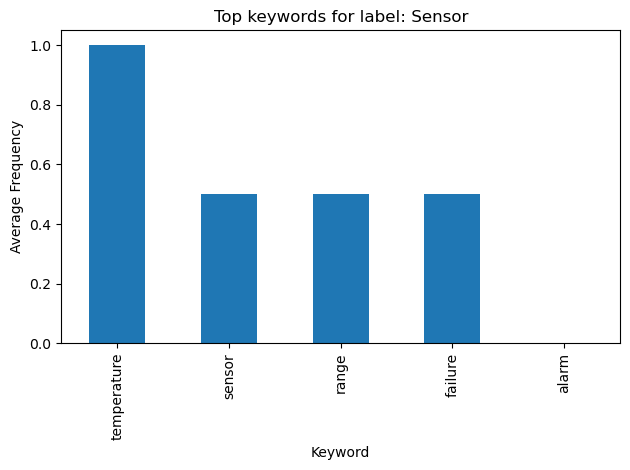

In [60]:
# Optional: Plot a bar chart for visual analysis (e.g., for one specific class)
selected_label = "Sensor"
top_keywords = mean_by_label[selected_label].sort_values(ascending=False).head(5)
top_keywords.plot(kind='bar', title=f"Top keywords for label: {selected_label}")
plt.ylabel("Average Frequency")
plt.xlabel("Keyword")
plt.tight_layout()
plt.show()